In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [226]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [227]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [228]:
df.drop(columns=['day', 'month', 'year'], inplace=True)

In [229]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [230]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0,1)

In [231]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [232]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [233]:
x = df.drop('FWI', axis=1)
y = df['FWI']

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [236]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.238037
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.397364
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.208736
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.054379
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.230579
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.178501
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.092098
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.280621
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.080091
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.184507


<Axes: >

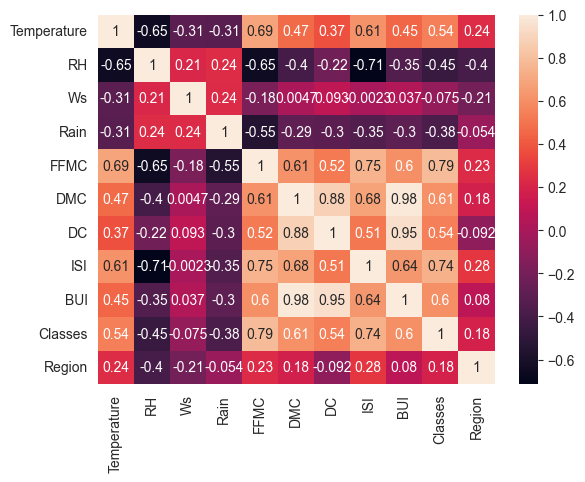

In [237]:
sns.heatmap(x_train.corr(), annot=True)

In [238]:
# sns.pairplot(x_train)

In [239]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [240]:
corr_features = correlation(x_train, 0.85)

In [241]:
corr_features

{'BUI', 'DC'}

In [242]:
x_train.drop(corr_features, inplace=True, axis=1)
x_test.drop(corr_features, inplace=True, axis=1)
x_train.shape, x_test.shape

((194, 9), (49, 9))

In [243]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
175,39,64,9,1.2,73.8,11.7,1.1,0,1
215,28,75,16,0.0,82.2,4.4,3.3,1,1
150,37,36,13,0.6,86.2,17.9,4.8,1,1
9,28,79,12,0.0,73.2,9.5,1.3,0,0
113,31,50,19,0.6,77.8,10.6,2.4,0,0


<Axes: >

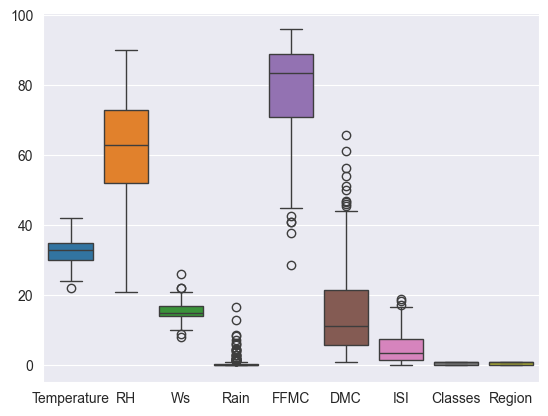

In [244]:
sns.boxplot(x_train)

In [245]:
from sklearn.preprocessing import StandardScaler

In [246]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<Axes: >

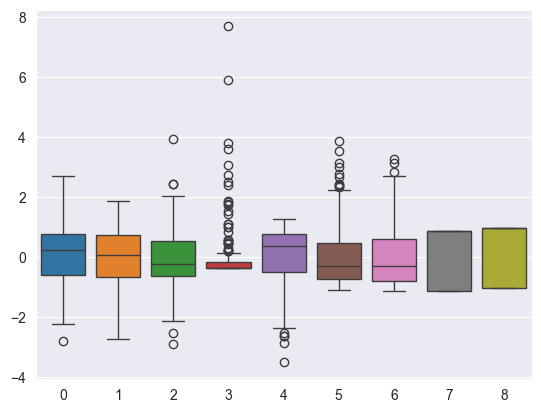

In [247]:
sns.boxplot(x_train)

<Axes: >

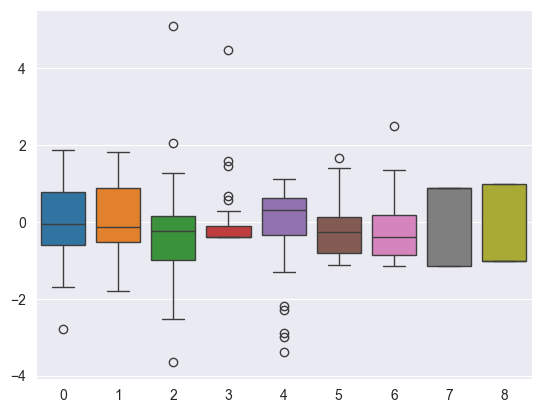

In [248]:
sns.boxplot(x_test)

# linear regression model

In [249]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

In [250]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(mae)
print(score)

0.5034072886824773
0.9805507766134701


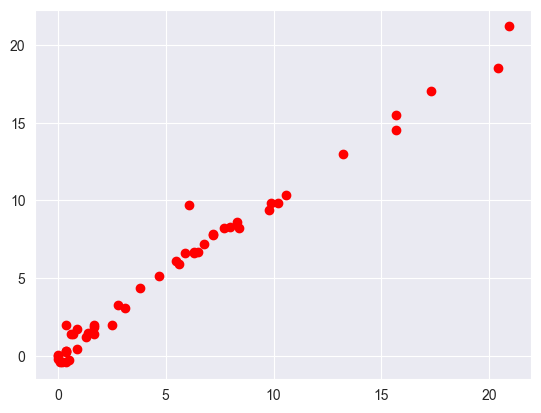

In [251]:
plt.scatter(y_test, y_pred, color='red')

In [252]:
# lr = Lasso(alpha=0.1)
# lr.fit(x_train, y_train)
# y_pred = lr.predict(x_test)
# mae = mean_absolute_error(y_test, y_pred)
# score = r2_score(y_test, y_pred)
# print(mae)
# print(score)

In [253]:
# lr = Ridge(alpha=0.1)
# lr.fit(x_train, y_train)
# y_pred = lr.predict(x_test)
# mae = mean_absolute_error(y_test, y_pred)
# score = r2_score(y_test, y_pred)
# print(mae)
# print(score)

In [254]:
# lr = ElasticNet(alpha=0.1)
# lr.fit(x_train, y_train)
# y_pred = lr.predict(x_test)
# mae = mean_absolute_error(y_test, y_pred)
# score = r2_score(y_test, y_pred)
# print(mae)
# print(score)

In [255]:
# svr = SVR()
# svr.fit(x_train, y_train)
# y_pred = svr.predict(x_test)
# mae = mean_absolute_error(y_test, y_pred)
# score = r2_score(y_test, y_pred)
# print(mae)
# print(score)

In [256]:
sc

StandardScaler()

In [257]:
lr

LinearRegression()

In [258]:
import pickle
pickle.dump(sc, open('sc.pkl', 'wb'))
pickle.dump(lr, open('lr.pkl', 'wb'))

In [259]:
model = pickle.load(open('lr.pkl', 'rb'))
scaler = pickle.load(open('sc.pkl', 'rb'))

In [260]:
model.predict(x_test)

array([ 8.22000593e+00,  7.78576827e+00, -2.57930746e-01,  4.35489954e+00,
        6.68251957e+00,  1.41260843e+00,  2.01172258e+00,  7.81503375e+00,
        1.73597532e+00,  3.29281152e+00,  3.36201348e-01,  9.71879331e+00,
        9.36298786e+00,  1.70663711e+01,  1.85114538e+01,  1.23465491e+00,
        1.96106972e+00,  6.64613012e-02,  7.18531603e+00,  3.08856409e+00,
        1.40957737e+00,  2.42534751e-01,  6.60296515e+00,  3.23197676e-01,
        2.11973486e+01,  5.14145267e+00,  5.92476482e+00,  9.80591526e+00,
        1.77468928e-02,  9.81281365e+00,  6.59270978e+00, -4.07504358e-01,
        1.03768028e+01,  1.45526011e+01,  1.46898542e+00,  4.39114463e-01,
        2.01371414e+00,  6.09032684e+00, -4.25861837e-01, -3.95192886e-01,
        6.69426447e+00,  1.82953108e+00,  8.62283593e+00, -2.08845348e-01,
        1.55174205e+01,  8.30800490e+00,  8.21199580e+00,  1.43847072e+00,
        1.29828128e+01])